In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr
from scipy import signal
import KDEpy as kdens

red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=1)
pl.rc('legend', fontsize=20)

%matplotlib inline

In [2]:
df = pd.read_hdf('../output/good.h5')
#df = df[df['k2_campaign_str'] == b'1']

In [3]:
x = df['bp_rp']
dx = np.sqrt((1/df['phot_bp_mean_flux_error'])**2 + 
             (1/df['phot_rp_mean_flux_error'])**2)
y = df['logperiod_mean']
dy = df['logperiod_sd']

<ErrorbarContainer object of 3 artists>

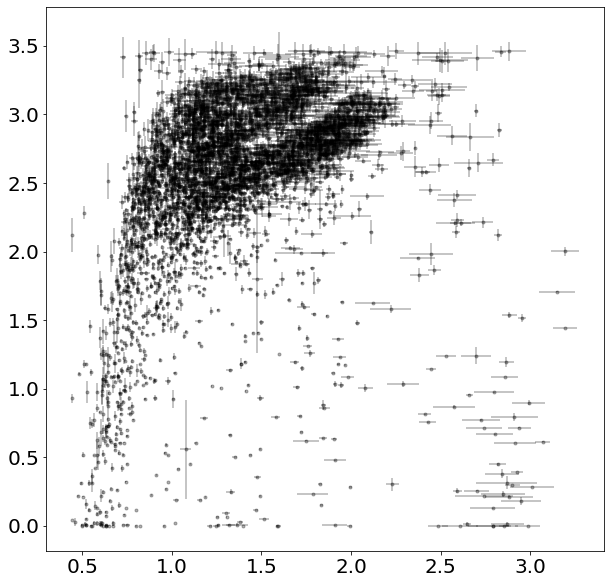

In [4]:
pl.figure(figsize=(10, 10))
gaptrend = np.log(5.8*(2**x))
pl.errorbar(x, y, yerr=dy, xerr=dx, fmt='k.', alpha=0.3)
#pl.xlim(0.5, 2.5)
#pl.ylim(1.0, 3.5)

(1.0, 3.5)

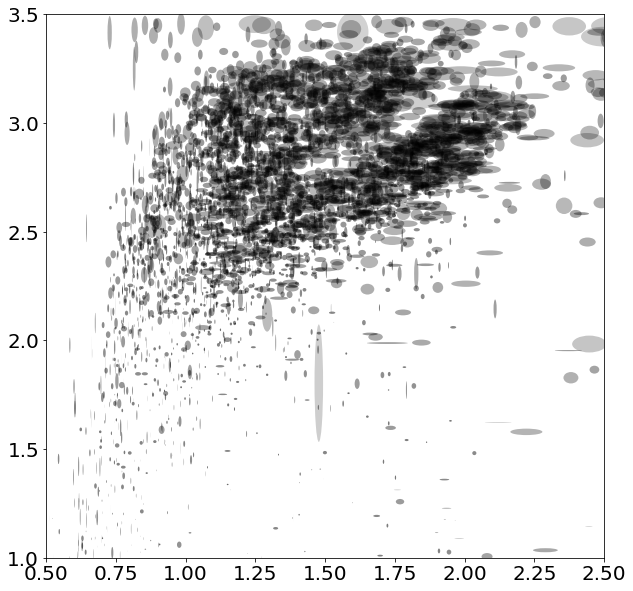

In [5]:
from matplotlib.patches import Ellipse
x, y, dx, dy = np.array(x), np.array(y), np.array(dx), np.array(dy)
alphas = -np.log(np.pi*dx*dy)
alphas /= np.max(alphas)
#alphas /= 50
#alphas = alphas/np.max(alphas)
fig = pl.figure(figsize=(10, 10))
ax = fig.gca()
for i in range(len(x)):
    e = Ellipse((x[i], y[i]), width=dx[i], height=dy[i])
    e.set_facecolor((0.0, 0.0, 0.0))
    e.set_alpha(alphas[i])
    ax.add_artist(e)
pl.xlim(0.5, 2.5)
pl.ylim(1.0, 3.5)

In [6]:
grid_points = 300
data = np.vstack((x, y)).T
w2 = np.array(np.sqrt(dx**2+dy**2))
w2[w2 > 0.05] = 0
kde = kdens.TreeKDE(bw=w2)
grid, points = kde.fit(data).evaluate(grid_points)
gridx, gridy = np.unique(grid[:, 0]), np.unique(grid[:, 1])
z1 = points.reshape(grid_points, grid_points).T

pl.figure(figsize=(10, 10))
# Plot the kernel density estimate
#pl.contour(gridx, gridy, z, 5, linewidths=0.8, colors='k')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

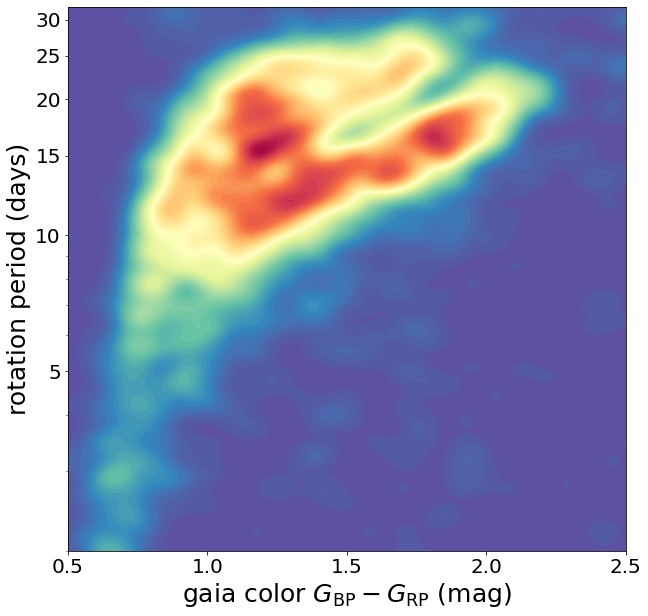

In [7]:
pl.figure(figsize=(10,10))
ctf = pl.contourf(gridx, np.exp(gridy), z1, 100, cmap='Spectral_r')
pl.yscale('log')
#pl.plot(x, y, 'ko', zorder=-1, alpha=0.3)
#ctf.cmap.set_under((0, 0, 0, 0))
#ctf.set_clim(0.1, np.max(z1))
pl.xlabel("gaia color $G_\mathrm{BP} - G_\mathrm{RP}$ (mag)")
pl.ylabel("rotation period (days)")
pl.gca().yaxis.set_major_formatter(pl.ScalarFormatter())
pl.gca().set_yticks([1, 5, 10, 15, 20, 25, 30])
pl.gca().set_xticks(np.linspace(0.5, 2.5, 5))
pl.xlim(0.5, 2.5)
pl.ylim(2.0, 32)
pl.savefig('/Users/tgordon/Desktop/kde.pdf')

In [8]:
cuts = (x > 1.4) & (x < 2.0)
x = x[cuts]
y = y[cuts]
dx = dx[cuts]
dy = dy[cuts]
gaptrend = gaptrend[cuts]
grid_points = 300
data = np.vstack((x, y-gaptrend)).T
w2 = np.array(np.sqrt(dx**2+dy**2))
w2[w2 > 0.05] = 0
kde = kdens.TreeKDE(bw=w2)
grid, points = kde.fit(data).evaluate(grid_points)

(-0.5, 0.5)

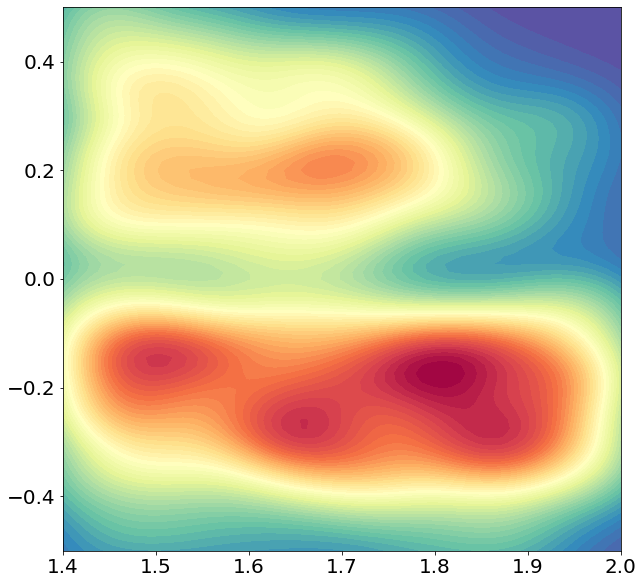

In [9]:
gridx, gridy = np.unique(grid[:, 0]), np.unique(grid[:, 1])
z1 = points.reshape(grid_points, grid_points).T

pl.figure(figsize=(10, 10))
# Plot the kernel density estimate
#pl.contour(gridx, gridy, z, 5, linewidths=0.8, colors='k')
pl.contourf(gridx, gridy, z1, 50, cmap='Spectral_r')
#pl.plot(data[:, 0], data[:, 1], '.k', alpha=0.1)
pl.xlim(1.4, 2.0)
pl.ylim(-0.5, 0.5)

Text(0.7, 0.8, '$\\partial^2/\\partial^2\\ \\log(P)$')

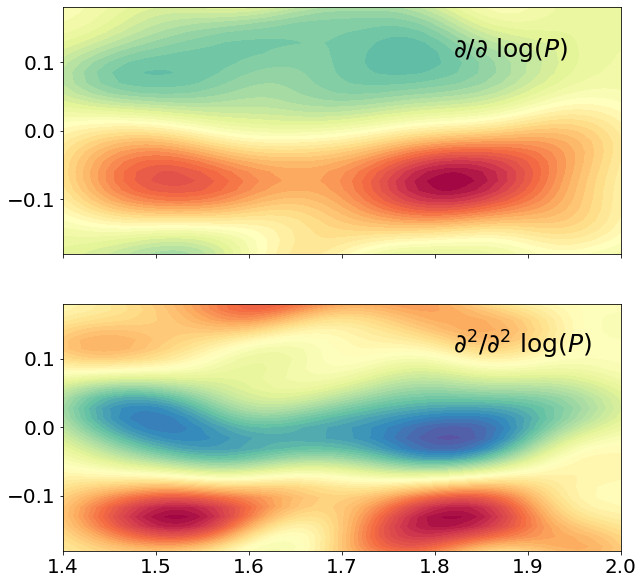

In [10]:
fig, ax = pl.subplots(2, 1, figsize=(10, 10), sharex=True)
#fig.subplots_adjust(hspace=0.5)
#pl.figure(figsize=(10, 10))
gradz = np.gradient(z1)[0]
#gradz = np.sqrt(gradz[0]**2 + gradz[1]**2)
ggradz = np.gradient(gradz)[0]
#ggradz = np.sqrt(ggradz[0]**2, ggradz[1]**2)
#ax[0].contour(gridx, gridy, z1, 10, colors='k', alpha=0.5)
#ax[1].contour(gridx, gridy, z1, 10, colors='k', alpha=0.5)
ax[0].contourf(gridx, gridy, gradz, 50, cmap='Spectral')
ax[1].contourf(gridx, gridy, ggradz, 50, cmap='Spectral')
#[x.set_xlim(0.5, 2.5) for x in ax]
#[x.set_ylim(1.0, 3.5) for x in ax]
[ax.set_xlim(1.4, 2.0) for ax in ax]
[ax.set_ylim(-0.18, 0.18) for ax in ax]
ax[0].annotate(r'$\partial/\partial\ \log(P)$', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=25)
ax[1].annotate(r'$\partial^2/\partial^2\ \log(P)$', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=25)

In [11]:
npeaks = 3
dy = np.mean(np.diff(gridy))
lower_edge = np.zeros((grid_points, npeaks))
midgap = np.zeros((grid_points, npeaks))
upper_edge = np.zeros((grid_points, npeaks))
lower_widths = np.zeros((grid_points, npeaks))
mid_widths = np.zeros((grid_points, npeaks))
upper_widths = np.zeros((grid_points, npeaks))
for i in range(grid_points):
    gz, ggz = gradz[:, i], ggradz[:, i]
    
    peaks = signal.find_peaks(ggz)[0]
    widths = signal.peak_widths(ggz, peaks)
    perm = np.argsort(ggz[peaks])[::-1]
    midgap[i, :len(peaks)] = gridy[peaks[perm][:npeaks]]
    mid_widths[i, :len(peaks)] = widths[0][perm][:npeaks]*dy
    
    peaks = signal.find_peaks(-gz)[0]
    widths = signal.peak_widths(-gz, peaks)
    perm = np.argsort(-gz[peaks])[::-1]
    lower_edge[i, :len(peaks)] = gridy[peaks[perm][:npeaks]]
    lower_widths[i, :len(peaks)] = widths[0][perm][:npeaks]*dy
    
    peaks = signal.find_peaks(gz)[0]
    widths = signal.peak_widths(gz, peaks)
    perm = np.argsort(gz[peaks])[::-1]
    upper_edge[i, :len(peaks)] = gridy[peaks[perm][:npeaks]]
    upper_widths[i, :len(peaks)] = widths[0][perm][:npeaks]*dy

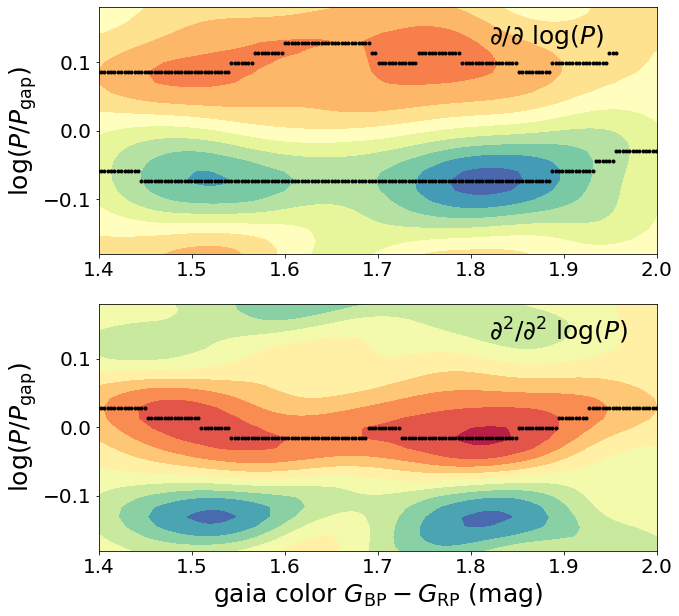

In [12]:
fig, ax = pl.subplots(2, 1, figsize=(10, 10))
ax[0].contourf(gridx, gridy, gradz, 10, cmap='Spectral_r')
ax[1].contourf(gridx, gridy, ggradz, 10, cmap='Spectral_r')
#ax[0].plot(gridx, midgap, 'k.')
ax[1].plot(gridx, midgap, 'k.')
ax[0].plot(gridx, lower_edge, 'k.')
#ax[1].plot(gridx, lower_edge, 'g.')
ax[0].plot(gridx, upper_edge, 'k.')
#ax[1].plot(gridx, upper_edge, 'g.')
[ax.set_xlim(1.4, 2.0) for ax in ax]
[ax.set_ylim(-0.18, 0.18) for ax in ax]
[ax.set_ylabel(r'$\log (P/P_\mathrm{gap})$') for ax in ax]
ax[1].set_xlabel(r'gaia color $G_\mathrm{BP} - G_\mathrm{RP}$ (mag)')
ax[0].annotate(r'$\partial/\partial\ \log(P)$', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=25)
ax[1].annotate(r'$\partial^2/\partial^2\ \log(P)$', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=25)
pl.savefig("/Users/tgordon/Desktop/partials.pdf")

In [13]:
xbounds = (gridx > 1.4) & (gridx < 2)
ybounds = (-0.2, 0.2)
#midgap = midgap.flatten()
selected_midgap = midgap[:,0][xbounds & (midgap[:,0] < ybounds[1]) & (midgap[:,0] > ybounds[0])]
selected_mid_widths = mid_widths[:,0][xbounds & (midgap[:,0] < ybounds[1]) & (midgap[:,0] > ybounds[0])]
gridx_midgap = gridx[xbounds & (midgap[:,0] < ybounds[1]) & (midgap[:,0] > ybounds[0])]

selected_lower = lower_edge[:,0][xbounds & (lower_edge[:,0] < ybounds[1]) & (lower_edge[:,0] > ybounds[0])]
selected_lower_widths = lower_widths[:,0][xbounds & (lower_edge[:,0] < ybounds[1]) & (lower_edge[:,0] > ybounds[0])]
gridx_lower = gridx[xbounds & (lower_edge[:,0] < ybounds[1]) & (lower_edge[:,0] > ybounds[0])]

selected_upper = upper_edge[:,1][xbounds & (upper_edge[:,1] < ybounds[1]) & (upper_edge[:,1] > ybounds[0])]
selected_upper_widths = upper_widths[:,1][xbounds & (upper_edge[:,1] < ybounds[1]) & (upper_edge[:,1] > ybounds[0])]
gridx_upper = gridx[xbounds & (upper_edge[:,1] < ybounds[1]) & (upper_edge[:,1] > ybounds[0])]

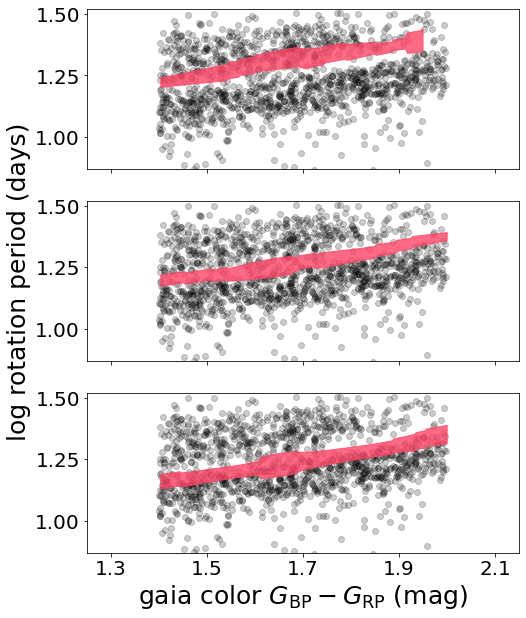

In [14]:
fig, ax = pl.subplots(3, 1, figsize=(8, 10), sharex=True)
pl.xlabel("gaia color $G_\mathrm{BP} - G_\mathrm{RP}$ (mag)")
ax[1].set_ylabel("log rotation period (days)")
#pl.errorbar(x, y, yerr=dy, xerr=dx, fmt='k.', alpha=0.3, zorder=-1)
l = np.log10(np.e)
[ax.plot(x, y*l, 'ko', alpha=0.2, zorder=-1) for ax in ax]
gaptrend_midgap = np.log(5.8*(2**gridx_midgap))
gaptrend_lower = np.log(5.8*(2**gridx_lower))
gaptrend_upper = np.log(5.8*(2**gridx_upper))
err_mid = l*selected_mid_widths/2.355
err_lower = l*selected_lower_widths/2.355
err_upper = l*selected_upper_widths/2.355
mid = (selected_midgap+gaptrend_midgap)*l
lower = (selected_lower+gaptrend_lower)*l
upper = (selected_upper+gaptrend_upper)*l
#ax[1].errorbar(gridx_midgap, (selected_midgap+gaptrend_midgap)*l, yerr=l*selected_mid_widths/2.355, color=red, linewidth=3)
#ax[0].errorbar(gridx_lower, (selected_lower+gaptrend_lower)*l, yerr=l*selected_lower_widths/2.355, color=red, linewidth=3)
#ax[2].errorbar(gridx_upper, (selected_upper+gaptrend_upper)*l, yerr=l*selected_upper_widths/2.355, color=red, linewidth=3)
ax[1].fill_between(gridx_midgap, mid-err_mid, mid+err_mid, color=red, alpha=0.8)
ax[2].fill_between(gridx_lower, lower-err_lower, lower+err_lower, color=red, alpha=0.8)
ax[0].fill_between(gridx_upper, upper-err_upper, upper+err_upper, color=red, alpha=0.8)
[ax.yaxis.set_major_formatter(pl.ScalarFormatter()) for ax in ax]
#[ax.set_yticks([1, 5, 10, 15, 20, 25, 30]) for ax in ax]
[ax.set_xticks(np.linspace(0.5, 2.5, 11)) for ax in ax]
[ax.set_xlim(1.25, 2.15) for ax in ax]
[ax.set_ylim(2*l, 3.5*l) for ax in ax]
fig.subplots_adjust(left=0.15)
pl.savefig("/Users/tgordon/Desktop/edges.pdf")

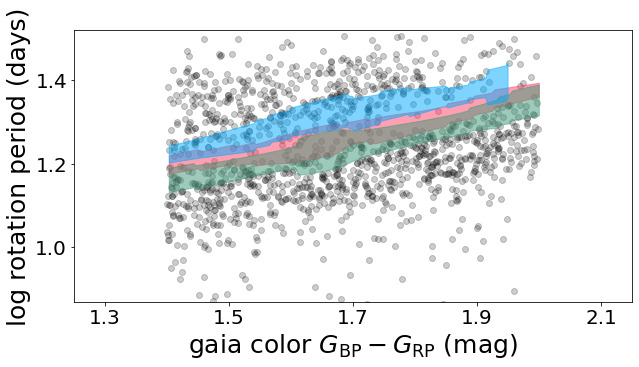

In [15]:
fig = pl.figure(figsize=(10, 5))
pl.xlabel("gaia color $G_\mathrm{BP} - G_\mathrm{RP}$ (mag)")
pl.ylabel("log rotation period (days)")
#pl.errorbar(x, y, yerr=dy, xerr=dx, fmt='k.', alpha=0.3, zorder=-1)
l = np.log10(np.e)
pl.plot(x, y*l, 'ko', alpha=0.2, zorder=-1)
gaptrend_midgap = np.log(5.8*(2**gridx_midgap))
gaptrend_lower = np.log(5.8*(2**gridx_lower))
gaptrend_upper = np.log(5.8*(2**gridx_upper))
err_mid = l*selected_mid_widths/2.355
err_lower = l*selected_lower_widths/2.355
err_upper = l*selected_upper_widths/2.355
mid = (selected_midgap+gaptrend_midgap)*l
lower = (selected_lower+gaptrend_lower)*l
upper = (selected_upper+gaptrend_upper)*l
#ax[1].errorbar(gridx_midgap, (selected_midgap+gaptrend_midgap)*l, yerr=l*selected_mid_widths/2.355, color=red, linewidth=3)
#ax[0].errorbar(gridx_lower, (selected_lower+gaptrend_lower)*l, yerr=l*selected_lower_widths/2.355, color=red, linewidth=3)
#ax[2].errorbar(gridx_upper, (selected_upper+gaptrend_upper)*l, yerr=l*selected_upper_widths/2.355, color=red, linewidth=3)
pl.fill_between(gridx_midgap, mid-err_mid, mid+err_mid, color=red, alpha=0.5)
pl.fill_between(gridx_lower, lower-err_lower, lower+err_lower, color=green, alpha=0.5)
pl.fill_between(gridx_upper, upper-err_upper, upper+err_upper, color=blue, alpha=0.5)
pl.gca().yaxis.set_major_formatter(pl.ScalarFormatter())
#[ax.set_yticks([1, 5, 10, 15, 20, 25, 30]) for ax in ax]
pl.gca().set_xticks(np.linspace(0.5, 2.5, 11))
pl.gca().set_xlim(1.25, 2.15)
pl.ylim(2*l, 3.5*l)
#fig.subplots_adjust(left=0.15)
pl.savefig("/Users/tgordon/Desktop/edges_filled.pdf")

In [16]:
bp_rp = 1.78

dy = 0.2
for bp_rp in np.linspace(1.4, 2.0, 7):
    mask_midgap = np.isclose(gridx_midgap, bp_rp, atol=dy)
    mask_lower = np.isclose(gridx_lower, bp_rp, atol=dy)
    mask_upper = np.isclose(gridx_upper, bp_rp, atol=dy)
    mid_ind = np.where(mask_midgap)[0][0]#gridx_midgap[mask_midgap][0]
    lower_ind = np.where(mask_lower)[0][0]#gridx_lower[mask_lower][0]
    upper_ind = np.where(mask_upper)[0][0]#gridx_upper[mask_upper][0]
    l10 = np.log(10)
    print("{:0.1f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} & {:0.2f} \\\\".format(bp_rp, 10**(upper[upper_ind]), 10**(upper[upper_ind])*l10*err_upper[upper_ind], 
                                        10**(mid[mid_ind]), 10**(mid[mid_ind])*l10*err_mid[mid_ind], 
                                        10**(lower[lower_ind]), 10**(lower[lower_ind])*l10*err_lower[lower_ind]))

1.4 & 16.69 & 0.79 & 15.76 & 0.82 & 14.46 & 0.98 \\
1.5 & 16.69 & 0.79 & 15.76 & 0.82 & 14.46 & 0.98 \\
1.6 & 16.69 & 0.79 & 15.76 & 0.82 & 14.46 & 0.98 \\
1.7 & 18.31 & 1.39 & 16.66 & 0.88 & 15.28 & 0.91 \\
1.8 & 19.99 & 1.57 & 17.31 & 1.38 & 16.35 & 1.01 \\
1.9 & 20.83 & 1.87 & 18.83 & 1.17 & 17.53 & 1.46 \\
2.0 & 22.33 & 1.59 & 19.91 & 1.19 & 18.80 & 1.17 \\


In [17]:
bp_rp = 1.78
np.isclose(gridx_midgap, bp_rp, atol=0.2)
#mask_midgap = np.isclose(gridx_midgap, bp_rp, atol=dy)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

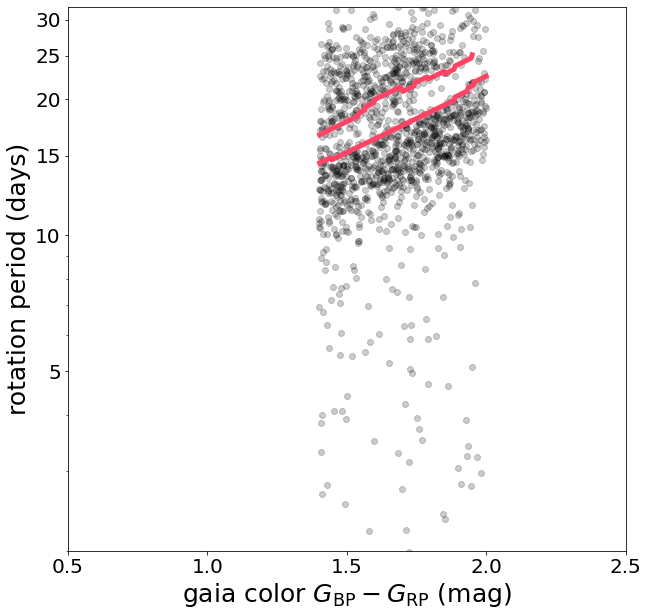

In [18]:
pl.figure(figsize=(10, 10))
pl.semilogy(x, np.exp(y), 'ko', alpha=0.2, zorder=-1)
gaptrend_midgap = np.log(5.8*(2**gridx_midgap))
gaptrend_lower = np.log(5.8*(2**gridx_lower))
gaptrend_upper = np.log(5.8*(2**gridx_upper))
#pl.plot(gridx_midgap, selected_midgap+gaptrend_midgap, color=red, linewidth=5)
pl.semilogy(gridx_lower, np.exp(selected_lower+gaptrend_lower), color=red, linewidth=5)
pl.semilogy(gridx_upper, np.exp(selected_upper+gaptrend_upper), color=red, linewidth=5)
pl.xlabel("gaia color $G_\mathrm{BP} - G_\mathrm{RP}$ (mag)")
pl.ylabel("rotation period (days)")
pl.gca().yaxis.set_major_formatter(pl.ScalarFormatter())
pl.gca().set_yticks([1, 5, 10, 15, 20, 25, 30])
pl.gca().set_xticks(np.linspace(0.5, 2.5, 5))
pl.xlim(0.5, 2.5)
pl.ylim(2.0, 32)
pl.savefig("/Users/tgordon/Desktop/period_edges.pdf")

In [45]:
from scipy.optimize import curve_fit
order = 2

def model2(x, x0, a, b, c):
    #return a*(x**b) + c*(x**d)
    return a*(x - x0)**0.5 + b*(x - x0) + c*(x-x0)**2# + c

def model1(x, a, b):
    return a*(x**b)

pfx = gridx_lower 
pfy = np.exp(selected_lower+gaptrend_lower)
pferr = pfy*selected_lower_widths/2.355
#coeffs_lower = np.polyfit(pfx, pfy, order)
coeffs_lower = curve_fit(model2, pfx, pfy, sigma=pferr)[0]

pfx = gridx_midgap
pfy = np.exp(selected_midgap+gaptrend_midgap)
pferr = pfy*selected_mid_widths/2.355
coeffs_mid = curve_fit(model2, pfx, pfy, sigma=pferr)[0]

#coeffs_midgap = np.polyfit(pfx, pfy, order)

pfx = gridx_upper 
pfy = np.exp(selected_upper+gaptrend_upper)
pferr = pfy*selected_upper_widths/2.355
#coeffs_upper = np.polyfit(pfx, pfy, order)
coeffs_upper = curve_fit(model2, pfx, pfy, sigma=pferr)[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


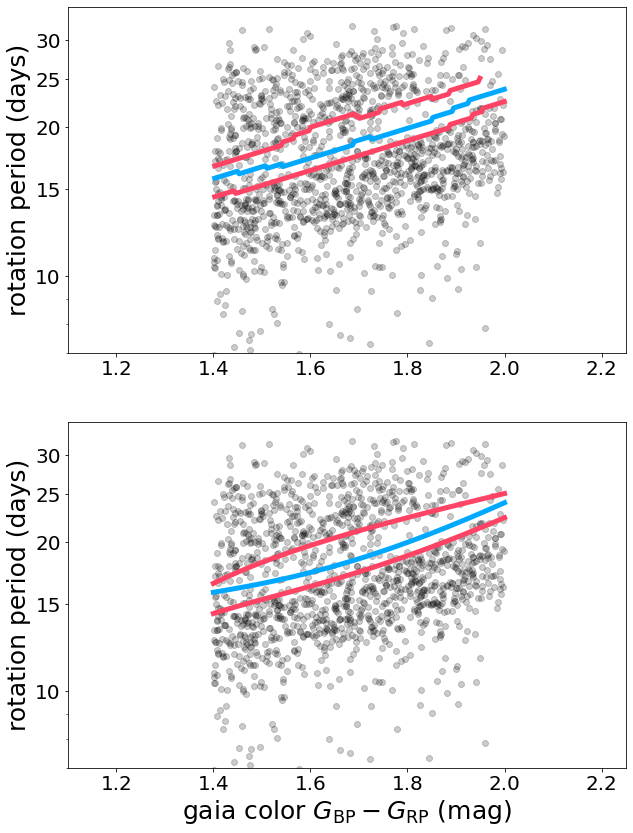

In [46]:
fig, ax = pl.subplots(2, 1, figsize=(10, 14))
#fig.subplots_adjust(bottom=0.2)
px = np.linspace(1.4, 2.0, 100)
ax[0].plot(gridx_lower, np.exp(selected_lower+gaptrend_lower), color=red, linewidth=5)
ax[0].plot(gridx_upper, np.exp(selected_upper+gaptrend_upper), color=red, linewidth=5)
ax[0].plot(gridx_midgap, np.exp(selected_midgap+gaptrend_midgap), color=blue, linewidth=5)
ax[1].plot(px, model2(px, *coeffs_upper), color=red, linewidth=5)
ax[1].plot(px, model2(px, *coeffs_lower), color=red, linewidth=5)
ax[1].plot(px, model2(px, *coeffs_mid), color=blue, linewidth=5)
[ax.plot(x, np.exp(y), 'ko', alpha=0.2, zorder=-1) for ax in ax]
[ax.set_yscale('log') for ax in ax]
ax[1].set_xlabel("gaia color $G_\mathrm{BP} - G_\mathrm{RP}$ (mag)")
[ax.set_ylabel("rotation period (days)") for ax in ax]
[ax.yaxis.set_major_formatter(pl.ScalarFormatter()) for ax in ax]
[ax.yaxis.set_minor_formatter(pl.NullFormatter()) for ax in ax]
[ax.set_yticks([10, 15, 20, 25, 30]) for ax in ax]
[ax.set_xticks(np.arange(1.0, 3.0, 0.2)) for ax in ax]
[ax.set_xlim(1.1, 2.25) for ax in ax]
[ax.set_ylim(7, 35) for ax in ax]
pl.savefig("/Users/tgordon/Desktop/edges_fit.pdf")

In [47]:
print(coeffs_upper)
print(coeffs_mid)
print(coeffs_lower)

[  1.06524565  38.49842352 -19.59193492   7.0589185 ]
[  0.93322099  55.25058092 -59.35992345  26.61453569]
[  1.09394769  48.91970147 -49.13753392  24.80955911]


In [ ]:
import KDEpy as kde
grid_points = 2**7
data = np.vstack((x, y)).T
kde = kde.FFTKDE(bw=0.025)
grid, points = kde.fit(data).evaluate(grid_points)

gridx, gridy = np.unique(grid[:, 0]), np.unique(grid[:, 1])
z2 = points.reshape(grid_points, grid_points).T

pl.figure(figsize=(10, 7))
# Plot the kernel density estimate
#pl.contour(gridx, gridy, z, 5, linewidths=0.8, colors='k')
pl.contourf(gridx, gridy, z2, 50, cmap='Spectral_r')
#pl.plot(data[:, 0], data[:, 1], '.k', alpha=0.1)

In [ ]:
pl.contourf(gridx, gridy, z1-z2, 50, cmap='Spectral_r')

In [ ]:
import statsmodels.api as sm

dens_u = sm.nonparametric.KDEMultivariate(data=[x, y], 
                                          var_type='cc', bw=[np.mean(dx), np.mean(dy)])

In [ ]:
gridx, gridy = np.meshgrid(np.linspace(x.min(), x.max(), grid_points), np.linspace(y.min(), y.max(), grid_points))
z = dens_u.pdf([gridx.flatten(), gridy.flatten()])
z = z.reshape(grid_points, grid_points)

In [ ]:
pl.contourf(gridx, gridy, z, 50, cmap='Spectral_r')

In [ ]:
dens_u.bw

In [ ]:
[np.array(dx), np.array(dy)]